In [ ]:
stable diffusion with optimum OpenVINO 

https://github.com/openvinotoolkit/openvino_notebooks/blob/ae9ecf6b8365ac1779e5634a4ee5195e530e886f/notebooks/stable-diffusion-v2/stable-diffusion-v2-optimum-demo.ipynb

In [1]:
from openvino.runtime import Core

ie = Core()
devices = ie.available_devices

for device in devices:
    device_name = ie.get_property(device, "FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")

CPU: Genuine Intel(R) 0000
GPU: Intel(R) Graphics (iGPU)
NPU: Intel(R) NPU


In [2]:
from optimum.intel.openvino import OVStableDiffusionPipeline

# download the pre-converted SD v2.1 model from Hugging Face Hub
name = "helenai/stabilityai-stable-diffusion-2-1-base-ov"
ov_pipe = OVStableDiffusionPipeline.from_pretrained(name, compile=False)
ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
ov_pipe.to('GPU')
ov_pipe.compile()

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

c:\workspace\llm\.venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Compiling the vae_decoder to GPU ...
Compiling the unet to GPU ...
Compiling the text_encoder to GPU ...


  0%|          | 0/18 [00:00<?, ?it/s]

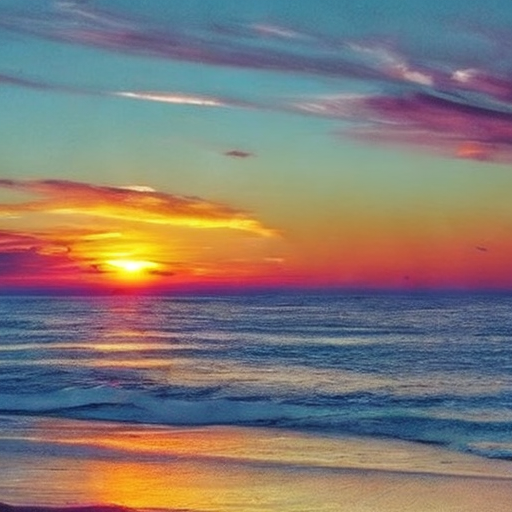

In [4]:
import gc

# Generate an image. 
#prompt = "sunny mountain road. beautiful scenary"
prompt = "a beautiful sunset over the ocean"
output_ov = ov_pipe(prompt, num_inference_steps=17, output_type="pil").images[0]
output_ov.save("image.png")
output_ov